# Linear Regression - Employeee Salary Prediction

In this Notebook I am trying to Predict employee salary based on the number of years of experience. 
In simple linear regression, we predict the value of one variable Y based on another variable X.
X is called the independent variable and Y is called the dependant variable.Its a simple Linear Regression model checking relationship between two variables.When the independent variable increases (or decreases), the dependent variable increases (or decreases) in a linear fashion.

## 1.Importing necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# read the csv file 
salary_df = pd.read_csv('salary.csv')

In [ ]:
salary_df

## 2. Performing Exploratory data analysis and Visualization

In [5]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [6]:
# Statistical summary of the dataframe
salary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

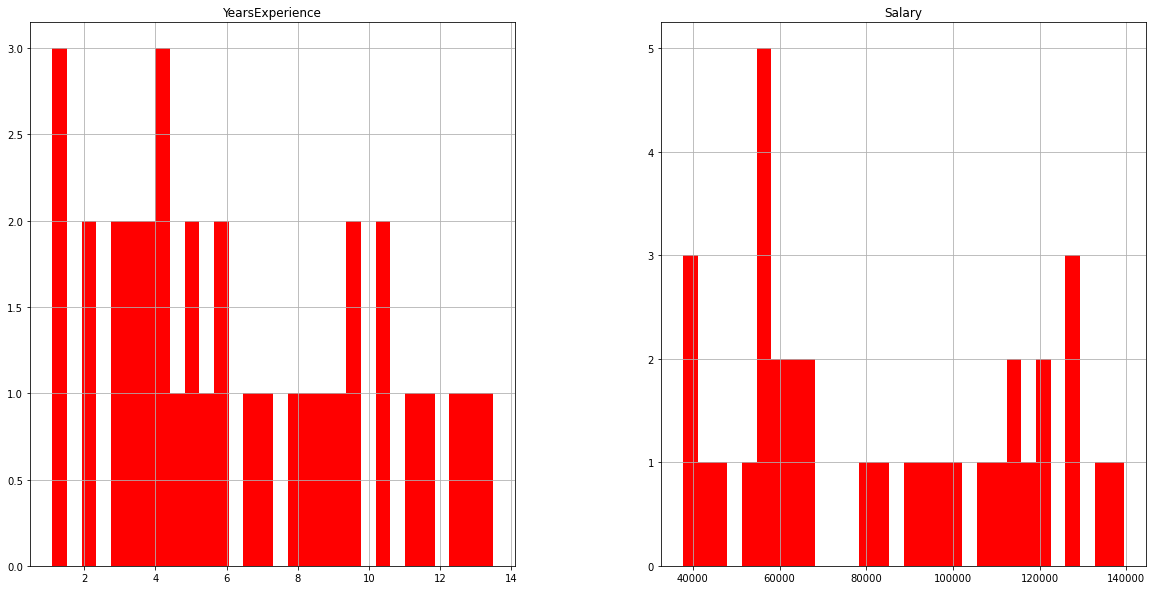

In [7]:
salary_df.hist(bins = 30, figsize = (20,10), color = 'r')


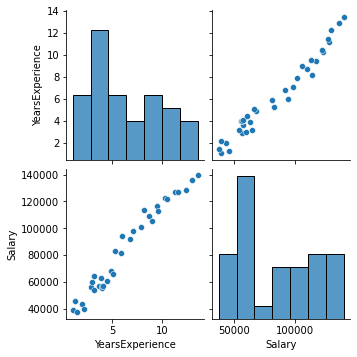

In [8]:
# plot pairplot
sns.pairplot(salary_df)

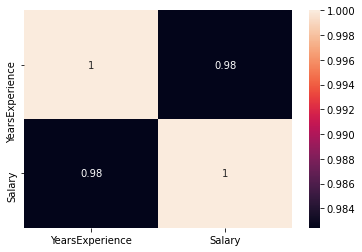

In [9]:
corr_matrix = salary_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

## 3.  Creating X and y dataset and Train and Test Split

In [10]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]


In [11]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [12]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


## 4.Training Using Linear Regression Model 

In [13]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [14]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.9449918945335148

In [15]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[8726.975]]
Linear Model Coefficient (b):  [29866.066]


In [16]:
regresssion_model_sklearn_withoutIntercept = LinearRegression(fit_intercept = False)
regresssion_model_sklearn_withoutIntercept.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [17]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn_withoutIntercept.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn_withoutIntercept.intercept_)

Linear Model Coefficient (m):  [[12278.148]]
Linear Model Coefficient (b):  0.0


Note - Intercept is made zero and therefore slope is different .It's a st line pass through orgin

## 5. Evaluate Model Performance 

In [19]:
y_predict = regresssion_model_sklearn.predict(X_test)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

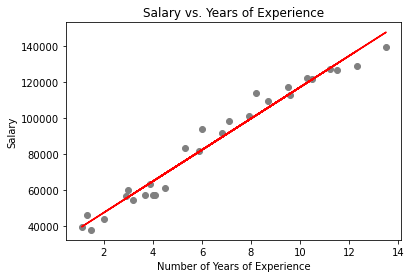

In [20]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary vs. Years of Experience')

## 6.Predict Salary for 5 Years of Experience 

In [21]:
number_of_exp =5

In [25]:
print('Salary predicted for 5 years of experience is : ', regresssion_model_sklearn.predict([[number_of_exp]]))

Salary predicted for 5 years of experience is :  [[73500.93945312]]
